In [1]:
import pandas as pd
import numpy as np
import math
import operator

In [17]:
data = pd.read_csv("irish.csv")
data.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
# Defining a function which calculates euclidean distance between two data points
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

# Defining our KNN model
def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
 
    length = testInstance.shape[1]
    
    #### Start of STEP 3
    # Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):
        
        #### Start of STEP 3.1
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)

        distances[x] = dist[0]
        #### End of STEP 3.1
 
    #### Start of STEP 3.2
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    #### End of STEP 3.2
 
    neighbors = []
    
    #### Start of STEP 3.3
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    #### End of STEP 3.3
    classVotes = {}
    
    #### Start of STEP 3.4
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    #### End of STEP 3.4

    #### Start of STEP 3.5
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)
    #### End of STEP 3.5

In [20]:
# Creating a dummy testset
testSet = [[7.2, 3.6, 5.1, 2.5]]
test = pd.DataFrame(testSet)

In [21]:
#### Start of STEP 2
# Setting number of neighbors = 1
k = 1
#### End of STEP 2
# Running KNN model
result,neigh = knn(data, test, k)

# Predicted class
print(result)

virginica


In [22]:
# Nearest neighbor
print(neigh)

[141]


In [23]:
# Setting number of neighbors = 3 
k = 3 
# Running KNN model 
result,neigh = knn(data, test, k) 
# Predicted class 
print(result)

virginica


In [24]:
# 3 nearest neighbors
print(neigh)

[141, 139, 120]


In [25]:
# Setting number of neighbors = 5
k = 5
# Running KNN model 
result,neigh = knn(data, test, k) 
# Predicted class 
print(result)

virginica


In [27]:
# 5 nearest neighbors
print(neigh)

[141, 139, 120, 145, 144]


In [34]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data.iloc[:,0:4], data['species'])

# Predicted class
print(neigh.predict(test))

# 3 nearest neighbors
print(neigh.kneighbors(test)[1])

['virginica']
[[141 139 120]]


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [38]:
scaler.fit(data.drop('species',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
scaler_features = scaler.transform(data.drop('species',axis=1))

In [40]:
df_feat=pd.DataFrame(scaler_features,columns=data.columns[:-1])
df_feat.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test=train_test_split(scaler_features,data['species'],test_size=0.30)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn= KNeighborsClassifier(n_neighbors=1)

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [46]:
pred = knn.predict(X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(confusion_matrix(y_test,pred))

[[12  0  0]
 [ 0 17  0]
 [ 0  0 16]]


In [49]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       1.00      1.00      1.00        17
  virginica       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00        45



In [52]:
error_rate = []

# will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [53]:
import matplotlib.pyplot as plt

Text(0,0.5,'Error rate')

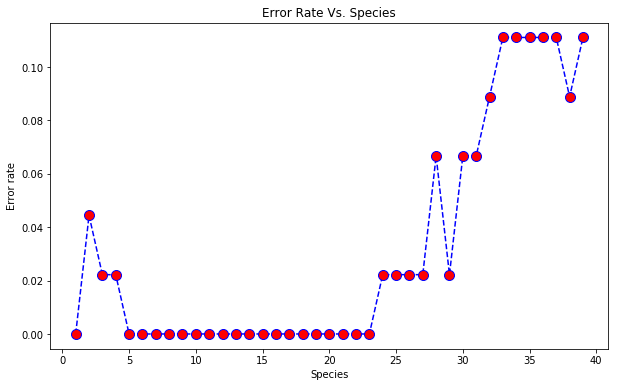

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs. Species')
plt.xlabel('Species')
plt.ylabel('Error rate')

NameError: name 'trainingSet' is not defined